# Classifying Pulsar Stars - Group 12

## Introduction

Pulsars are rapidly rotating Neutron stars that form from the remains of the collapsed core of a giant star after its death. They contain strong magnetic fields and produce radio emissions at very regular intervals. Pulsars are detectable from Earth when the beam of radio waves are angled such that it is within the field of view of an Earth-based telescope. They are also of significant scientific interest as they are considered a remarkable cosmic tool for probes of states of matter, search for planets beyond Earth's solar system and measure cosmic distances (Cofield, 2016). 

Due to the abundance of detections caused by radio frequency interference (RFI) and noise, distinguishing legitimate signals from noise proves to be a challenge. As such, the question of whether a particular candidate is truly pulsar or non-pulsar remains. Therefore, we aim to adopt a classification system that helps to determine the class of an unknown pulsar candidate as accurately as possible. 

The dataset we will be using is the HRTU2 Dataset, which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (retrieved from https://archive.ics.uci.edu/ml/datasets/HTRU2#). Because each pulsar emission varies in terms of shape and amplitude, they are stacked to obtain an integrated average profile of the pulse. Furthermore, the DM-SNR Curve (Dispersion Measure — Signal-to-noise ratio) was adopted to adjust the shape of the delay to compensate for the variations in the emission’s arrival time across different radio frequencies (Krishnan, 2020). By utilizing both these features, we have eight numerical variables that a pulsar candidate can be evaluated upon, and a single class variable  with labels of 0 (negative; non-pulsar) and 1 (positve; real pulsar). These are:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

This dataset contains a total of 17898 observations, where 16259 are negative examples caused by RFI/noise, and 1639 real pulsar examples. 

In [41]:
# setting the seed & installing the required library and packages
# Run this before continuing!
set.seed(2001)
library(tidyverse)
library(tidymodels)
library(cowplot)
library(ggplot2)
install.packages("GGally")
library(GGally)

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## Preliminary exploratory data analysis
#### 1. Demonstrate that the dataset can be read from the web into R 

In [42]:
#reading the pulsar dataset directly from web
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip"

temp <- tempfile()
download.file(url,temp)
pulsar_data <- read_csv(unz(temp, "HTRU_2.csv"))
unlink(temp)

pulsar_data

Parsed with column specification:
cols(
  `140.5625` = col_double(),
  `55.68378214` = col_double(),
  `-0.234571412` = col_double(),
  `-0.699648398` = col_double(),
  `3.199832776` = col_double(),
  `19.11042633` = col_double(),
  `7.975531794` = col_double(),
  `74.24222492` = col_double(),
  `0` = col_double()
)



140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0
107.25781,39.49649,0.465881961,1.16287712,4.0794314,24.980418,7.397080,57.78474,0


#### 2. Clean and wrangle your data into a tidy format

In [43]:
#added column names & tidied data
colnames(pulsar_data) <- c("mean_pf", "std_pf", "kurt_pf", "skew_pf", "mean_dm", "std_dm", "kurt_dm", "skew_dm", "class")

pulsar_unscaled <- pulsar_data %>%
                mutate(class = as_factor(class))
pulsar_unscaled

mean_pf,std_pf,kurt_pf,skew_pf,mean_dm,std_dm,kurt_dm,skew_dm,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0
107.25781,39.49649,0.465881961,1.16287712,4.0794314,24.980418,7.397080,57.78474,0


#### 3. Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

In [44]:
#summary of data
summary(pulsar_unscaled)

#checking for missing values
table(is.na(pulsar_unscaled))

    mean_pf            std_pf         kurt_pf            skew_pf       
 Min.   :  5.812   Min.   :24.77   Min.   :-1.87601   Min.   :-1.7919  
 1st Qu.:100.930   1st Qu.:42.38   1st Qu.: 0.02711   1st Qu.:-0.1885  
 Median :115.078   Median :46.95   Median : 0.22324   Median : 0.1987  
 Mean   :111.078   Mean   :46.55   Mean   : 0.47790   Mean   : 1.7704  
 3rd Qu.:127.086   3rd Qu.:51.02   3rd Qu.: 0.47335   3rd Qu.: 0.9282  
 Max.   :192.617   Max.   :98.78   Max.   : 8.06952   Max.   :68.1016  
    mean_dm             std_dm          kurt_dm          skew_dm        
 Min.   :  0.2132   Min.   :  7.37   Min.   :-3.139   Min.   :  -1.977  
 1st Qu.:  1.9231   1st Qu.: 14.44   1st Qu.: 5.781   1st Qu.:  34.957  
 Median :  2.8018   Median : 18.46   Median : 8.434   Median :  83.069  
 Mean   : 12.6149   Mean   : 26.33   Mean   : 8.304   Mean   : 104.859  
 3rd Qu.:  5.4649   3rd Qu.: 28.43   3rd Qu.:10.703   3rd Qu.: 139.311  
 Max.   :223.3921   Max.   :110.64   Max.   :34.540   Max.


 FALSE 
161073 

In [45]:
# creating training and test sets
pulsar_split <- initial_split(pulsar_unscaled, prop = 0.75, strata = class)  
pulsar_train <- training(pulsar_split)   
pulsar_test <- testing(pulsar_split)

# checking if data corresponds to a train / test split of 75% / 25%, as desired
glimpse(pulsar_train)
glimpse(pulsar_test)

Rows: 13,423
Columns: 9
$ mean_pf <dbl> 103.01562, 136.75000, 88.72656, 119.48438, 130.38281, 107.250…
$ std_pf  <dbl> 39.34165, 57.17845, 40.67223, 48.76506, 39.84406, 52.62708, 3…
$ kurt_pf <dbl> 0.32332837, -0.06841464, 0.60086608, 0.03146022, -0.15832276,…
$ skew_pf <dbl> 1.05116443, -0.63623837, 1.12349169, -0.11216757, 0.38954045,…
$ mean_dm <dbl> 3.1212375, 3.6429766, 1.1789298, 0.9991639, 1.2207358, 2.3319…
$ std_dm  <dbl> 21.744669, 20.959280, 11.468720, 9.279612, 14.378941, 14.4868…
$ kurt_dm <dbl> 7.735822, 6.896499, 14.269573, 19.206230, 13.539456, 9.001004…
$ skew_dm <dbl> 63.17191, 53.59366, 252.56731, 479.75657, 198.23646, 107.9725…
$ class   <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
Rows: 4,474
Columns: 9
$ mean_pf <dbl> 102.50781, 93.57031, 114.36719, 100.85156, 136.09375, 99.3671…
$ std_pf  <dbl> 58.88243, 46.69811, 51.94572, 51.74352, 51.69100, 41.57220, 4…
$ kurt_pf <dbl> 0.465318154, 0.531904850, -0.094498904, 0.393836792, -0.04590…
$ ske

The split was as desired, with 13423 rows in the training data corresponding to exactly 75% of our original data, while 4474 rows in the test data corresponds to 25% of our original data.

In [46]:
# number & percentage of pulsar and non-pulsar observations
# to check if proportion of initial class data was preserved when splitting
original_proportions <- pulsar_unscaled %>%
                        group_by(class) %>%
                        summarize(n = n()) %>%
                        mutate(percent = 100*n/nrow(pulsar_unscaled))
original_proportions

training_proportions <- pulsar_train %>%
                      group_by(class) %>%
                      summarize(n = n()) %>%
                      mutate(percent = 100*n/nrow(pulsar_train))

training_proportions

`summarise()` ungrouping output (override with `.groups` argument)



class,n,percent
<fct>,<int>,<dbl>
0,16258,90.842041
1,1639,9.157959


`summarise()` ungrouping output (override with `.groups` argument)



class,n,percent
<fct>,<int>,<dbl>
0,12187,90.791924
1,1236,9.208076


The tables above show our original proportions of the classes followed by the proportions in the training set. 90.8% of our training data is negative and 9.2% is positive, indicating that our class proportions were roughly preserved when we split the data.

#### 4. Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

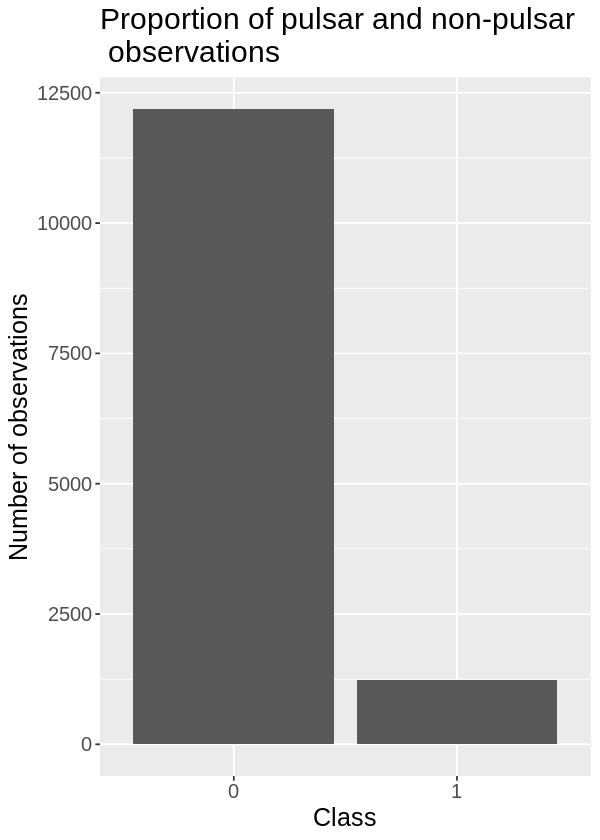

In [47]:
# proportion of pulsar and non-pulsar observations
options(repr.plot.width = 5, repr.plot.height = 7)
pulsar_plot <- ggplot(training_proportions, aes(x = class, y = n)) +
                geom_bar(stat = "identity") +
                labs(x = "Class", y = "Number of observations") +
                theme(text = element_text(size = 15)) +
                ggtitle("Proportion of pulsar and non-pulsar \n observations")

pulsar_plot

In [48]:
dist1 <- ggplot(pulsar_train, aes(x = mean_pf)) +
                geom_histogram() +
                geom_vline(xintercept = 111.078, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Mean of integrated profile", y = "Measurements") 

dist2 <- ggplot(pulsar_train, aes(x = std_pf)) +
                geom_histogram() +
                geom_vline(xintercept = 46.55, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Standard deviation of the integrated profile", y = "Measurements") 

dist3 <- ggplot(pulsar_train, aes(x = kurt_pf)) +
                geom_histogram() +
                geom_vline(xintercept = 0.47790, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Excess kurtosis of the integrated profile", y = "Measurements") 

dist4 <- ggplot(pulsar_train, aes(x = skew_pf)) +
                geom_histogram() +
                geom_vline(xintercept = 1.7704, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Skewness of the integrated profile", y = "Measurements") 

dist5 <- ggplot(pulsar_train, aes(x = mean_dm)) +
                geom_histogram() +
                geom_vline(xintercept = 12.6149, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Mean of the DM-SNR curve", y = "Measurements") 

dist6 <- ggplot(pulsar_train, aes(x = std_dm)) +
                geom_histogram() +
                geom_vline(xintercept = 26.33, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Standard deviation of the DM-SNR curve", y = "Measurements")

dist7 <- ggplot(pulsar_train, aes(x = kurt_dm)) +
                geom_histogram() +
                geom_vline(xintercept = 8.304, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Excess kurtosis of the DM-SNR curve", y = "Measurements")

dist8 <- ggplot(pulsar_train, aes(x = skew_dm)) +
                geom_histogram() +
                geom_vline(xintercept = 104.859, linetype = "dashed", size = 1.0, color = "red") +
                labs(x = "Skewness of the DM-SNR curve", y = "Measurements")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



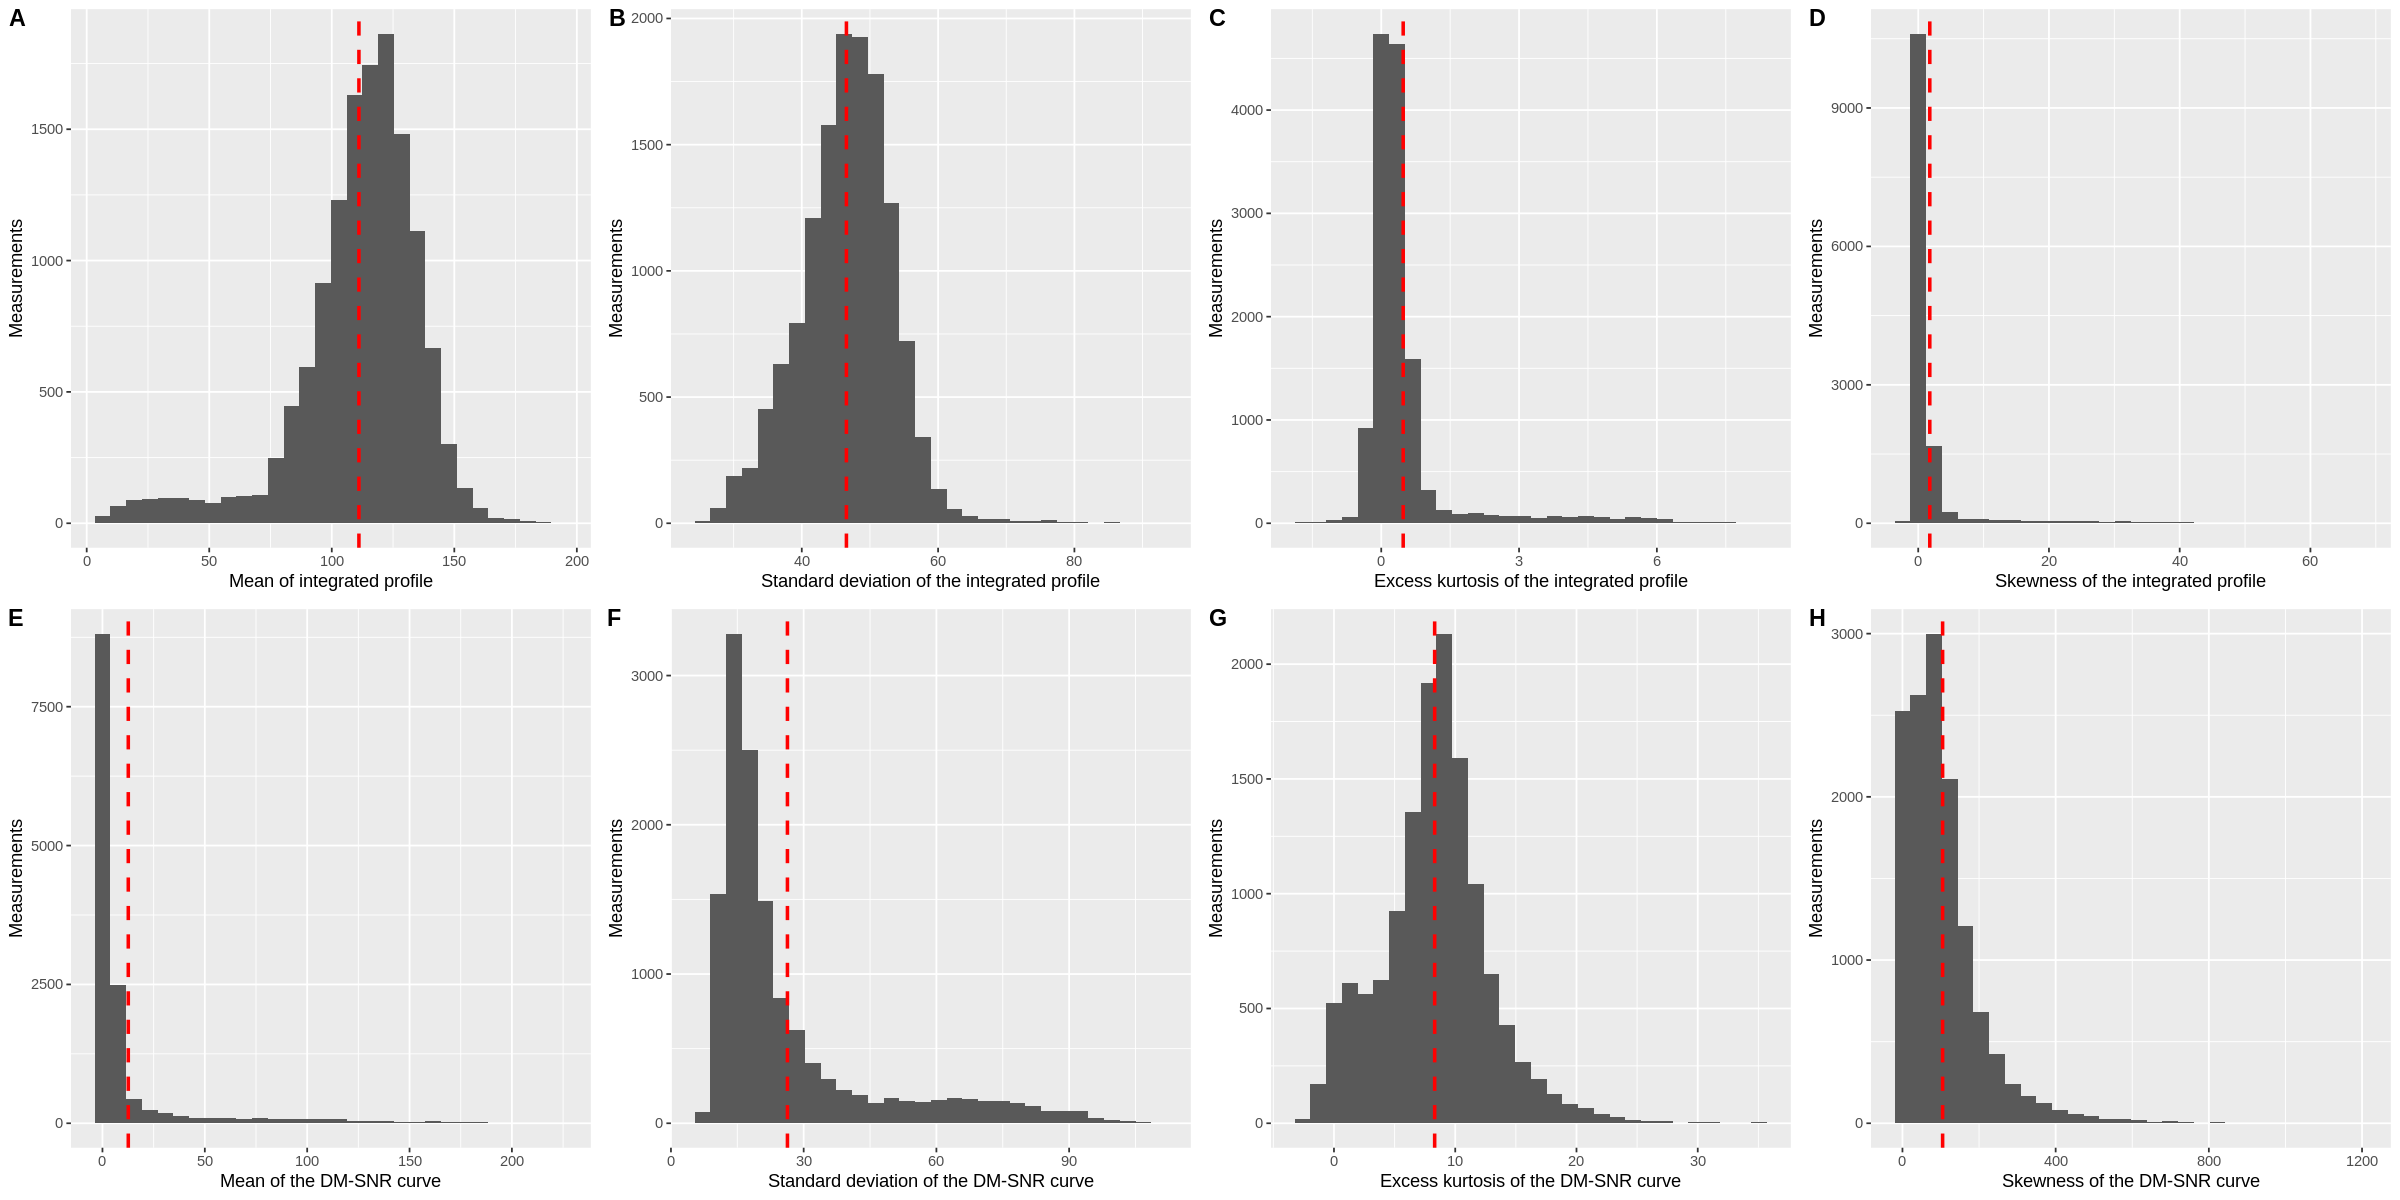

In [49]:
# distributions of each of the variables
## the red dotted vertical line indicates the mean value
options(repr.plot.width = 20, repr.plot.height = 10) 
plot_grid(dist1, dist2, dist3, dist4, dist5, dist6, dist7, dist8, labels = "AUTO", ncol = 4)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



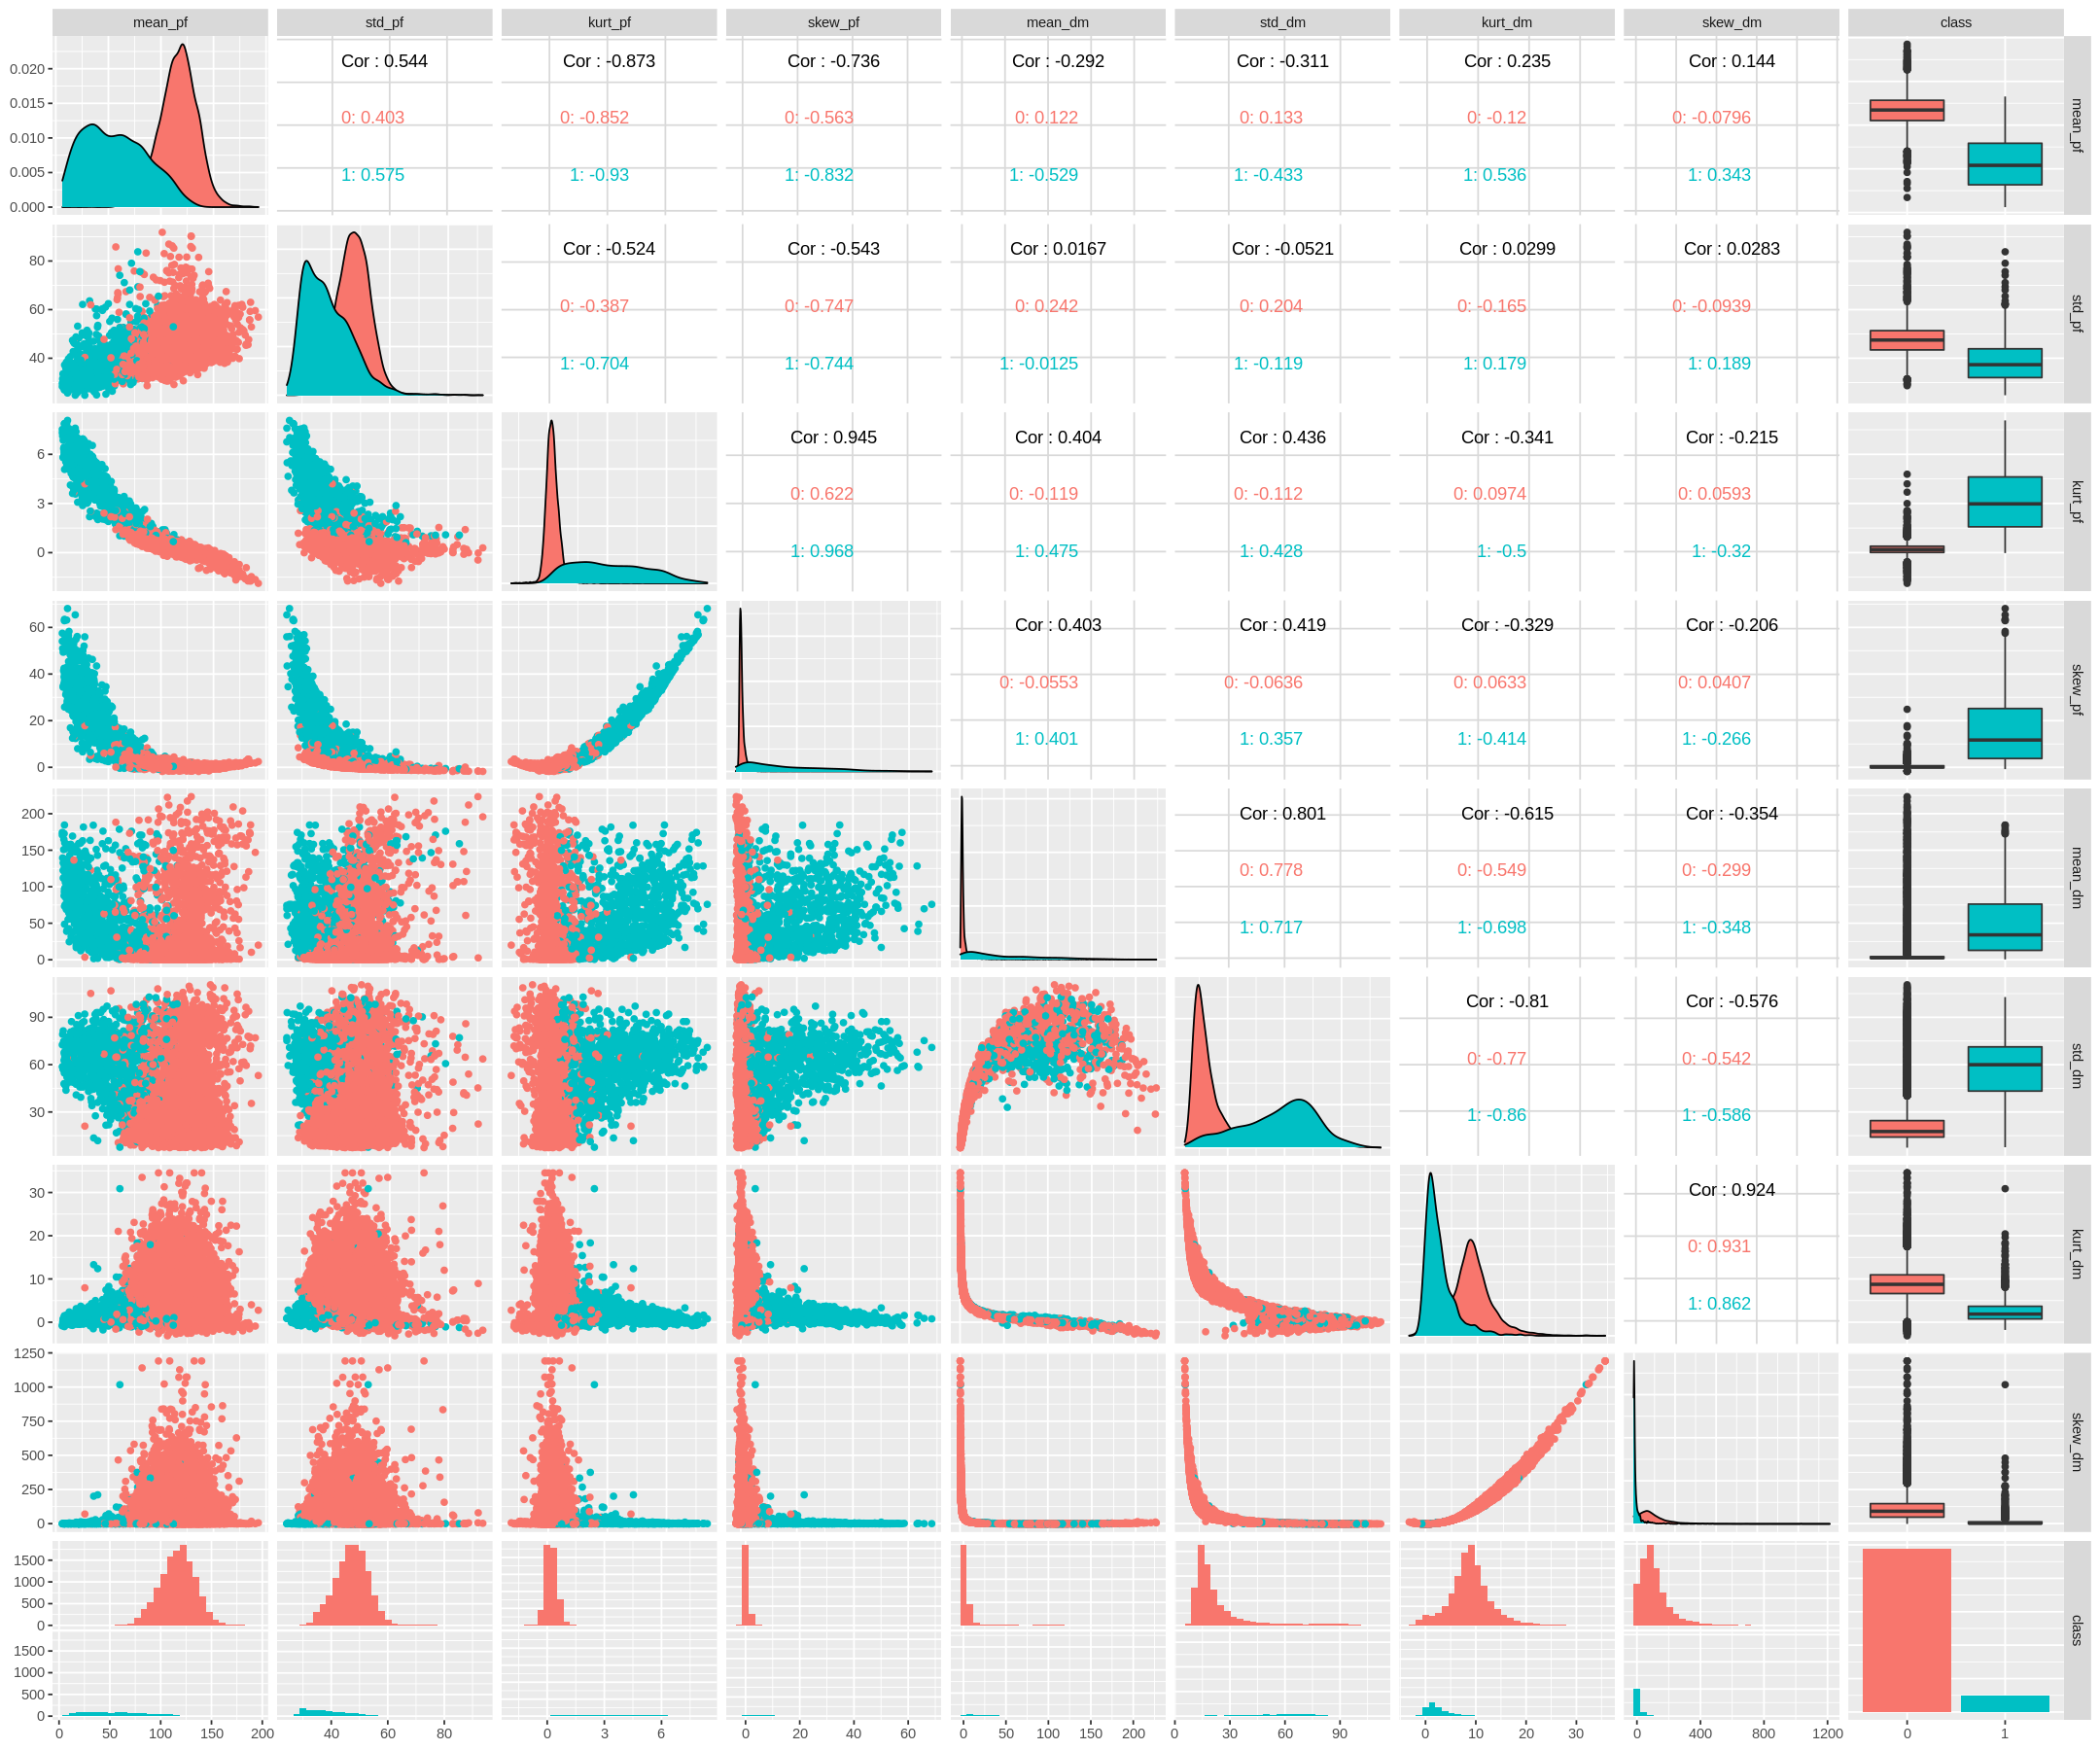

In [50]:
#relationship between each of the predictor variables
options(repr.plot.width = 18, repr.plot.height = 15) 
ggpairs(pulsar_train, aes(color = class))

In [51]:
plot1 <- ggplot(pulsar_unscaled, aes(x = mean_pf, y = kurt_pf, color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "Mean of the integrated profile", y = "Excess kurtosis of \n the integrated profile", color = "Class") +
                theme(text = element_text(size = 15)) +
                ggtitle("mean_pf vs kurt_dm") 

plot2 <- ggplot(pulsar_unscaled, aes(x = mean_pf, y = skew_pf, color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "Mean of the integrated profile", y = "Skewness of integrated profile", color = "Class") +
                theme(text = element_text(size = 15)) +
                ggtitle("mean_pf vs skew_pf")

plot3 <- ggplot(pulsar_unscaled, aes(x = kurt_pf, y = skew_pf, color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "Excess kurtosis of the integrated profile", y = "Skewness of the integrated profile", color = "Class") +
                theme(text = element_text(size = 15)) +
                ggtitle("kurt_pf vs skew_pf")


plot4 <- ggplot(pulsar_unscaled, aes(x = mean_dm, y = std_dm, color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "Mean of the DM-SNR curve", y = "Standard deviation of \n the DM-SNR curve", color = "Class") +
                theme(text = element_text(size = 15)) +
                ggtitle("mean_dm vs std_dm")

plot5 <- ggplot(pulsar_unscaled, aes(x = std_dm,, y = skew_dm, color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "Standard deviation of the DM-SNR curve", y = "Skewness of the DM-SNR curve", color = "Class") +
                theme(text = element_text(size = 15)) +
                ggtitle("std_dm vs skew_dm")

plot6 <- ggplot(pulsar_unscaled, aes(x = kurt_dm,, y = skew_dm, color = class)) +
                geom_point(alpha = 0.4) +
                labs(x = "Excess kurtosis of the DM-SNR curve", y = "Skewness of the DM-SNR curve", color = "Class") +
                theme(text = element_text(size = 15)) +
                ggtitle("kurt_dm vs skew_dm")


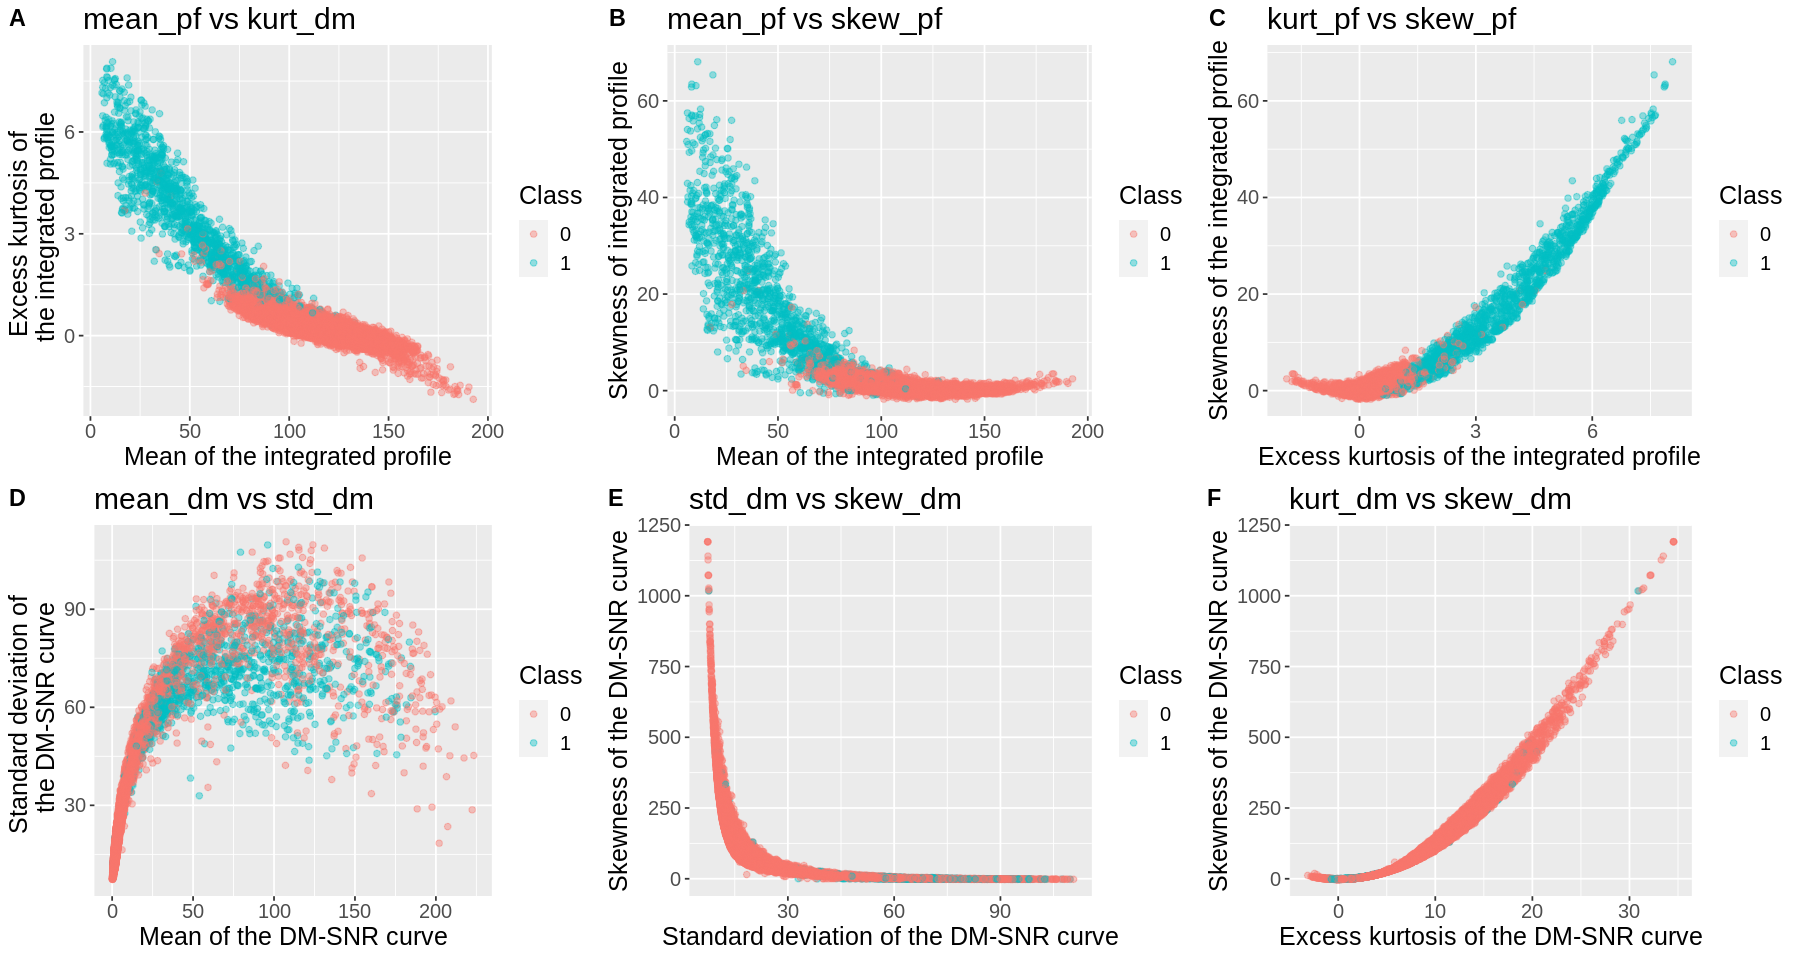

In [52]:
# a closer look at the relationship between a sample of predictor variables
options(repr.plot.width = 15, repr.plot.height = 8) 
plot_grid(plot1, plot2, plot3, plot4, plot5, plot6, labels = "AUTO")

From the pair plots above, it is clear that there exists some correlation between each of the variables. Notably, there is a strong negative non-linear correlation between mean and excess kurtosis and the mean and skewness of the integrated profiles. There is a positive relationship between excess kurtosis and skewness from both the integrated profile and DM-SNR curve. 

## Methods

#### 1. Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

Our initial analysis of the raw dataset revealed eight numeric variables and one binary (target) variable. As there  was an absence of column names, we assigned the provided variable names and converted our target variable from a double to a factor data type. Visual analysis also revealed a higher proportion of negative (0) observations than real (1) pulsar stars, and the scales of the data were somewhat uneven between variables. Therefore, scaling and centering the data in addition to balancing the classes is required before building our classifier later. 

#### 2. Describe at least one way that you will visualize the results

By analyzing the relationship between the variables using the ggpairs() function, we can see that there is a correlation between each predictor and the class variable.  Therefore, we decided to use all eight as our predictors because they all play a relevant role in their ability to identify our target variable. We also visualized the distribution of each variable using histograms along with their means as denoted with the red vertical dotted-line on each plot. 


## Expected outcomes and significance

#### 1. What do you expect to find?

We expect to identify real pulsars among candidates as accurately as possible by building a classification model.

#### 2. What impact could such findings have?

As pulsars are extremely rare by nature, formulating a model to help automate the process of identifying them would greatly contribute to scientific research in the astronomical field, especially in the study of pulsars and gravitational waves.

#### 3. What future questions could this lead to?

It could raise research on how pulsars lead to the exploration of planets beyond our solar system and "point the way to energetic cosmic events like collisions between supermassive black holes" (Cofield, 2020).

## References

Cofield, C. (2016, April 22). What are pulsars? Space.com. Retrieved from https://www.space.com/32661-pulsars.html. 

Krishnan, S. (2020, September 29). Pulsar candidate classification. Medium. Retrieved from https://medium.com/swlh/pulsar-candidate-classification-a1805a369e17. 

Lyon, R. J. (2017, February 14). HTRU2, DOI: 10.6084/m9.figshare.3080389.v1. Retrieved from https://archive.ics.uci.edu/ml/datasets/HTRU2#.

(725 words)